# Homework 3 - ASTRO 530 - Olivier Gilbert

## 1.

In [134]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
plt.rcParams["font.family"] = "Times New Roman"
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['text.usetex'] = False
plt.rc("axes", labelsize=16) 

def mass_growth(M_0, t, beta):
    """M(t) = M_0/(1-\beta M_0 t) where \beta M_0 t<<1"""
    return M_0/(1-beta*M_0*t)

### a)

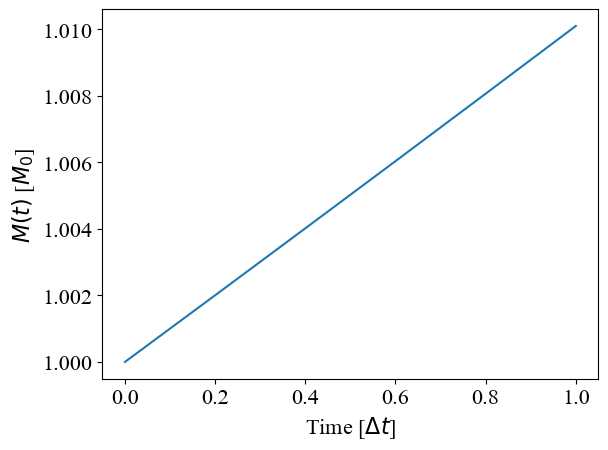

In [166]:
M_0 = 1 # in units of M_0
t = np.linspace(0,1,1000) # in units of Delta t
beta_ = 0.01 # in units of (M_0*Delta t)^-1
plt.plot(t,mass_growth(M_0,t,beta_))
plt.xlabel(r"Time [$\Delta t$]")
plt.ylabel(r"$M(t)$ [$M_0$]")
plt.show()

### b)

$$\beta = \frac{2\pi G^2 \rho_0}{\left(c_{s,0}^2 + v_0^2\right)^{3/2}}$$

Assuming the characteristic flow velocity $v_0$ is zero and characteristic values for molecular clouds ($\mathrm{H}_2$, $n=10^2\mathrm{cm^{-3}}$, $T=10\mathrm{K}$), we can calculate $\beta$ in [$M_\odot^{-1}\mathrm{Myr^{-1}}$] :

$$\rho_0 = n\cdot m_{\mathrm{H}_2} \quad \quad m_{\mathrm{H}_2} = 3.34\times10^{-24}\mathrm{g}$$
$$\rho_0 = 10^2\mathrm{cm^{-3}} \cdot 3.34\times10^{-24}\mathrm{g} = 3.34\times10^{-22}\mathrm{g/cm^3}$$

In [103]:
rho0 = 3.34E-22 # g cm^-3
T = 10 # K
k = 1.3807E-16 # erg K^-1
G = 6.674E-8 # cm^3 g^-1 s^-2
m_H = 1.67E-24 # g
mu = 2 # because we have H_2


c_s0 = np.sqrt(k*T/(mu*m_H)) # cm s^-1
beta = 2*np.pi*G**2*rho0/(c_s0**2)**(3/2) # g^-1 s^-1
beta = beta*1.989E33*3.1536E13 # M_odot^-1 Myr^-1
print("c_s0",c_s0)
print("beta",beta)

c_s0 20331.828091269464
beta 0.06976070209130501


$$\beta = 6.976\times 10^{-2} \, [M_\odot^{-1}\mathrm{Myr^{-1}}]$$

### c)

In [163]:
def plot_dists(recording_of_masses, times):
    def plot_dist(dist, ax:plt.Axes, t, **kwargs):
        counts, bin_edges = np.histogram(dist, bins=50, density=False)
        mass_bins = np.array([(bin_edges[i]+bin_edges[i+1])/2 for i in range(len(bin_edges)-1)])
        ax.stairs(np.log10(counts), bin_edges, fill=True, alpha=0.5, label=f"T={t:.2f} Myr", **kwargs)
        #ax.step(np.log10(mass_bins),np.log10(counts/mass_bins), where="mid", color="black")
        #ax.fill_between((mass_bins),np.zeros_like(mass_bins),np.log10(counts/mass_bins), where="mid", color="black")
        ax.set_xlabel(r"$M$ [$M_\odot$]", fontsize=15)
        ax.set_ylabel(r"N", fontsize=15)
        ax.legend(fontsize=15)
    plt.figure(figsize=(18,3))
    ax1 = plt.subplot(131)
    ax2 = plt.subplot(132)
    ax3 = plt.subplot(133)
    plot_dist(np.array(recording_of_masses)[:,0],ax1,times[0], color="blue")
    plot_dist(np.array(recording_of_masses)[:,int(len(times)/2)],ax2,times[int(len(times)/2)], color="orange")
    plot_dist(np.array(recording_of_masses)[:,-1],ax3,times[-1], color="red")
    plt.show()

3.3333333333333335


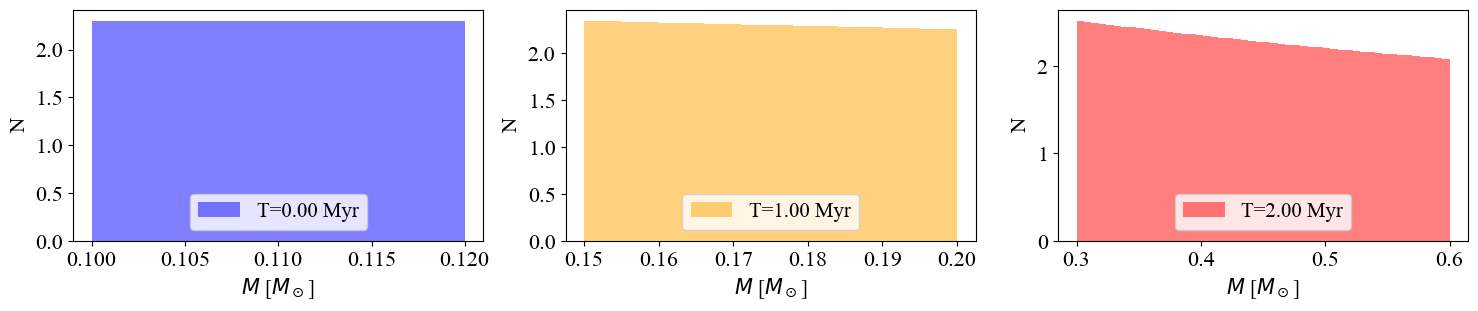

In [164]:
# Evolve the masses
set_of_masses = np.linspace(0.1,0.12,10000) # in M_odot
times = np.linspace(0,2,10000) # in Myr
recording_of_masses = []
beta = 0.8/(times[-1]*np.max(set_of_masses))
print(beta)
for m0 in set_of_masses:
    recording_of_masses.append(mass_growth(m0, times, beta))
# Plot the initial, intermediate, and final mass distribution
plot_dists(recording_of_masses,times)

### d)

/var/folders/bq/dl39th_j0f71bgv_rs5frsgm0000gq/T/ipykernel_39293/863702807.py:5: RuntimeWarning: divide by zero encountered in log10
  ax.stairs(np.log10(counts), bin_edges, fill=True, alpha=0.5, label=f"T={t:.2f} Myr", **kwargs)


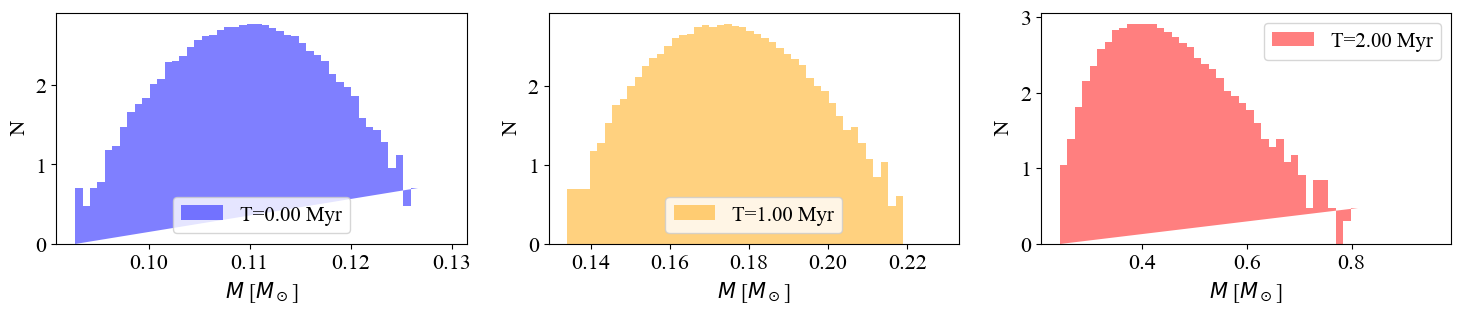

In [165]:
# Evolve the masses with non-uniform prior masses
from scipy.stats import norm
set_of_masses = np.random.normal(loc=0.11, scale=0.005, size=10000) # in M_odot
times = np.linspace(0,2,10000) # in Myr
recording_of_masses = []
for m0 in set_of_masses:
    recording_of_masses.append(mass_growth(m0, times, beta))
plot_dists(recording_of_masses,times)

## 2.